## <b> Problem Statement:</b>
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### <b>Independent Variables:</b>

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

<b>You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.</b> 

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [105]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
import plotly.express as px
import os
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [106]:
# Importing Loan Predication CSV dataset file using pandas
df=pd.read_csv('loan_prediction.csv')

In [107]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [108]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [109]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

 <b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

In [110]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

<b> Since dataset is large,  Let check for any entry which is repeated or duplicated in dataset at same date. </b>

#### Comment:
Dataset doesnot contain Any duplicate entry. So Yes To Go !!!

### Datatype Check

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- <b> Comment </b>:
    - In loan application status dataset we have 614 rows with 13 columns including target variable.
    - A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.
    - Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
    - There are three types of datatype dtypes: float64(4), int64(1), object(8)

### Missing value check 

In [112]:
# missing_values = df.isnull().sum().sort_values(ascending = False)
# percentage_missing_values =(missing_values/len(df))*100
# print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- <b> Comment :</b>
    - 7 out 13 columns contains missing value.
    - As small amount of data is missing so we use mean amd mode to replace with NaN values.
    
<b> Lets explore categorical features before missing value imputation.</b>

### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [113]:
# category=['Gender','Married','Dependents','Education','Self_Employed',
#           'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']

df.drop("Loan_ID",axis=1,inplace=True)
category=df.select_dtypes(include="object")

for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


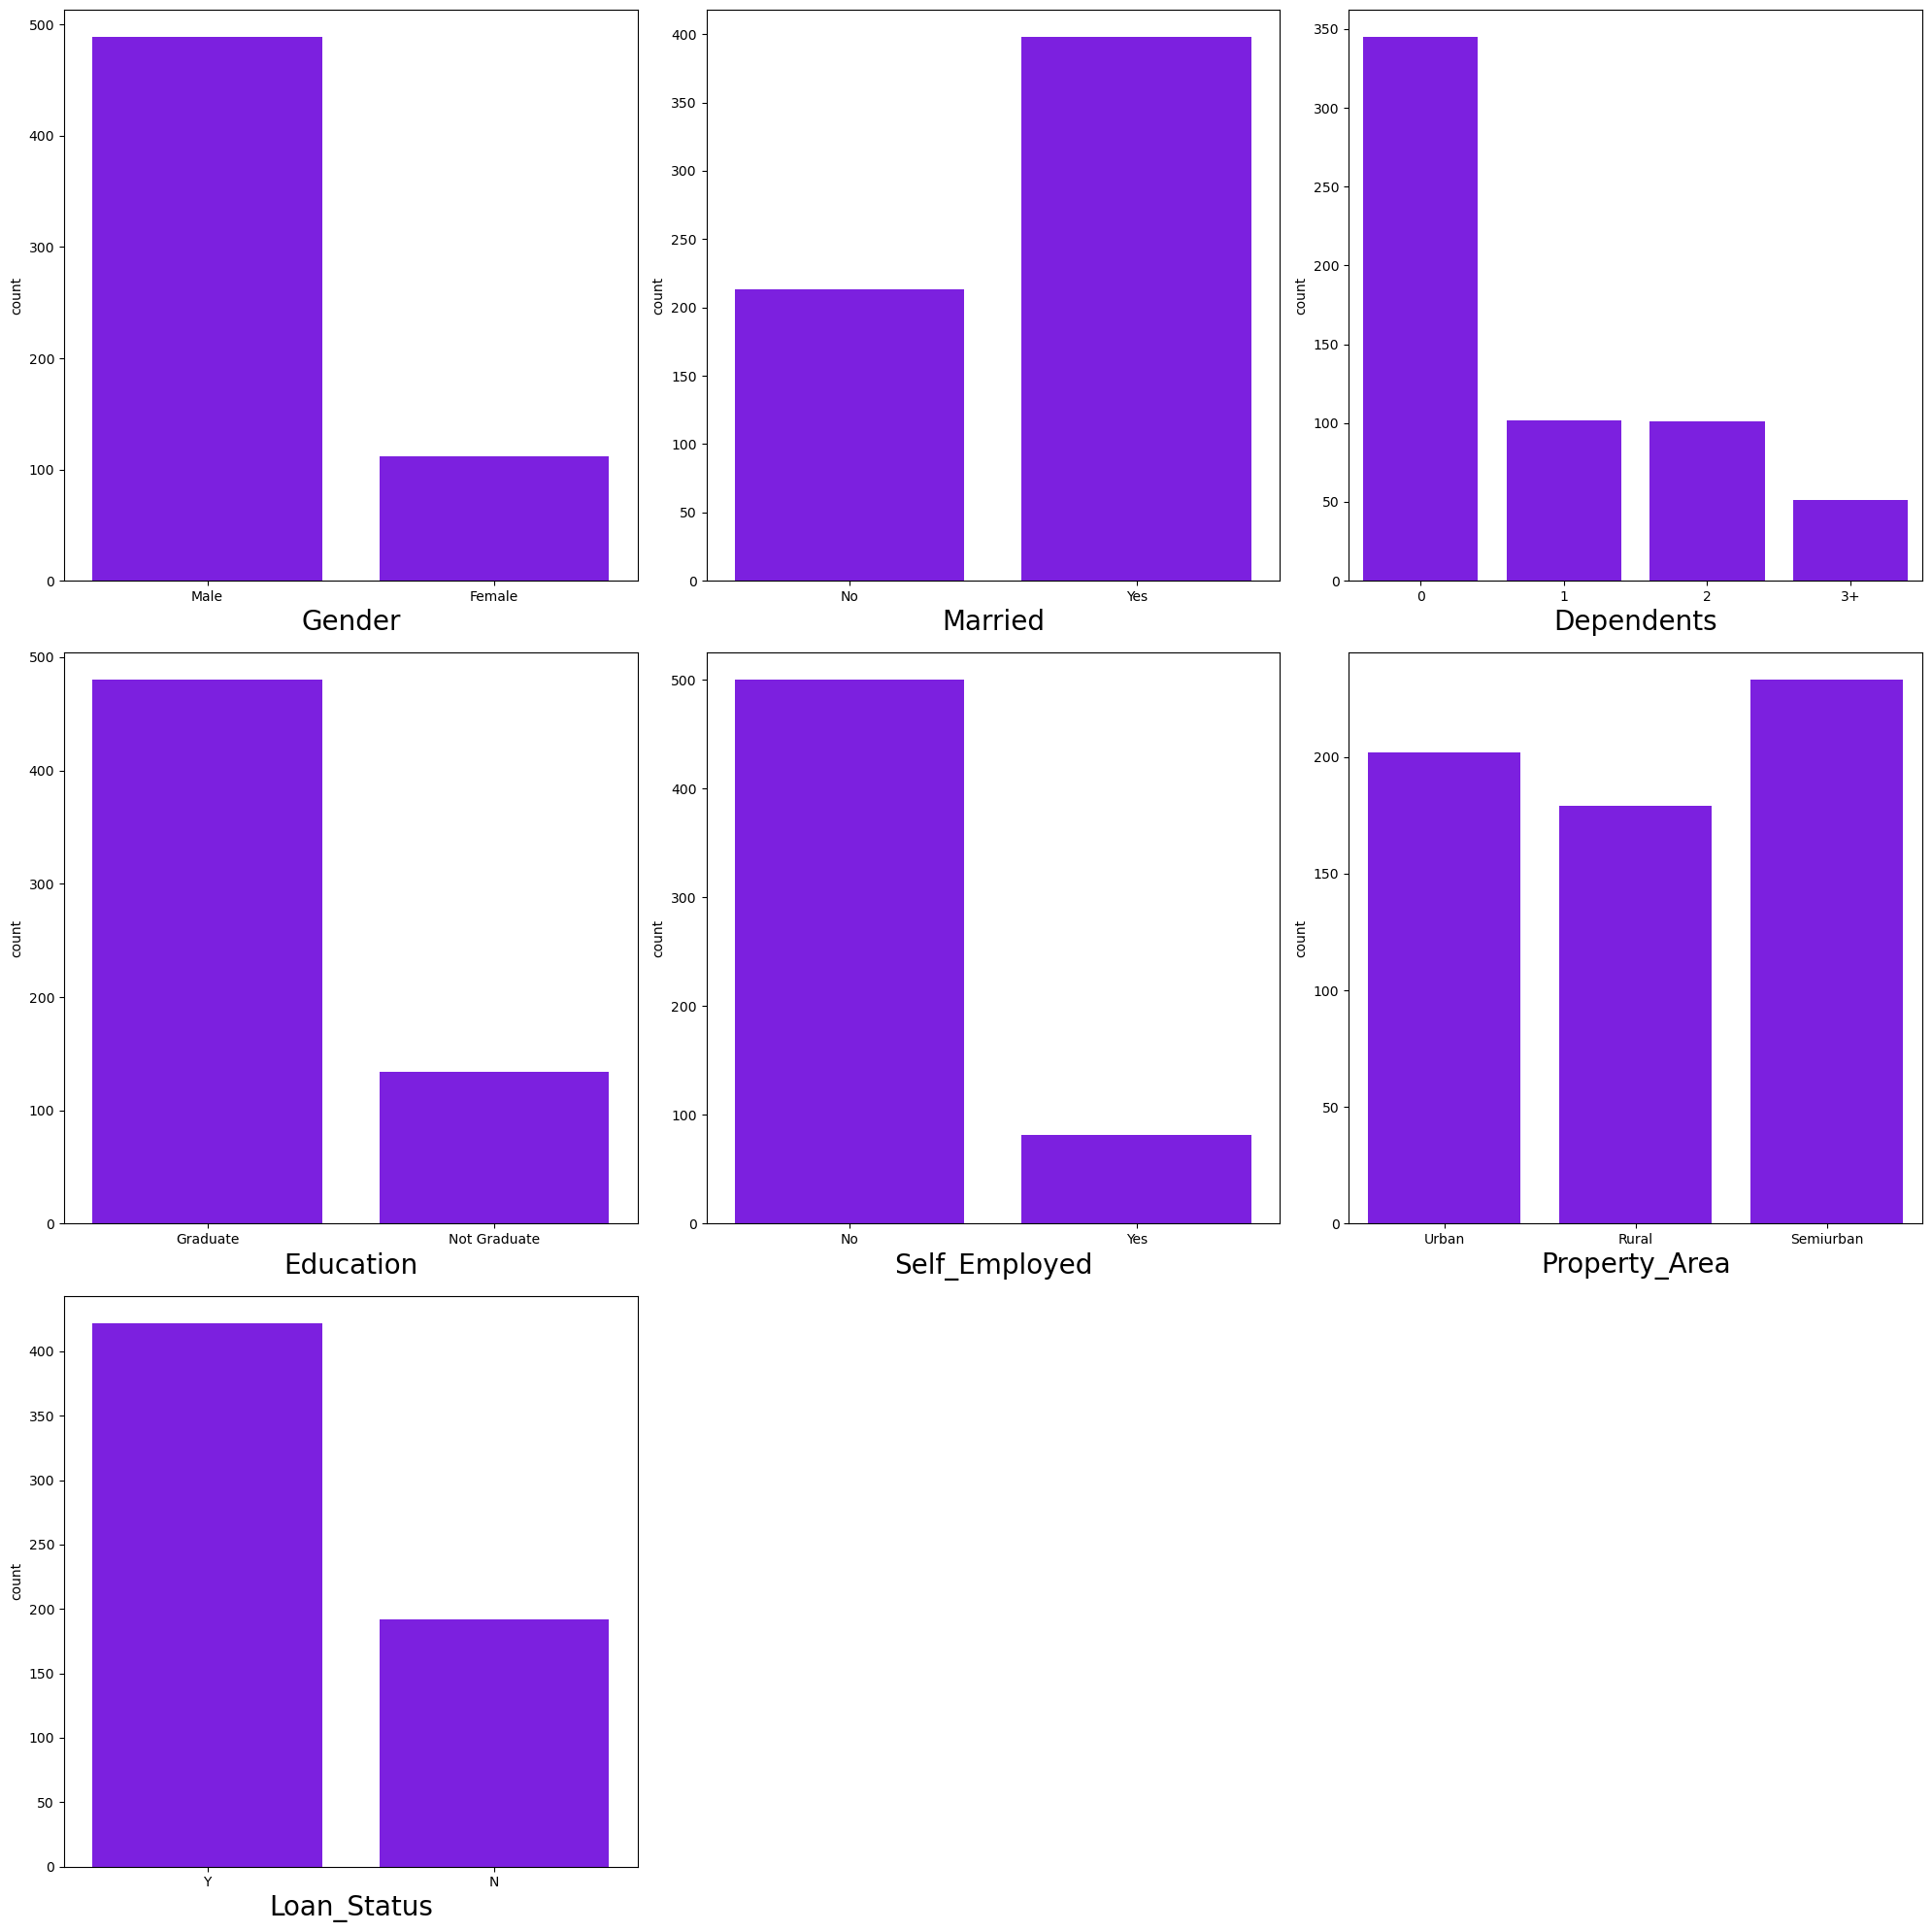

In [114]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
# category=['Gender','Married','Dependents','Education','Self_Employed',
#           'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- <b> Comment:</b>
     - Out of Total loan application 80 % applicants are Male. <b>We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?</b>
     - Only 20% applicants are self employed. <b> So it will interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.</b>
     - Nearly 70% are married and 75% of loan applicants are graduates
     - Almost 60% of the applicants have no dependents.
     - Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
     - 80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.
     - Nearly 70 % applicant gets loan approved.
    
<b> We can impute categoical variable with mode in that category. For numerical variable we have option of mean and median. If Outliers are to strech then we will impute with median.</b>
    
### Let check outliers for missing values Numerical variable having missing values by plotting boxplot.

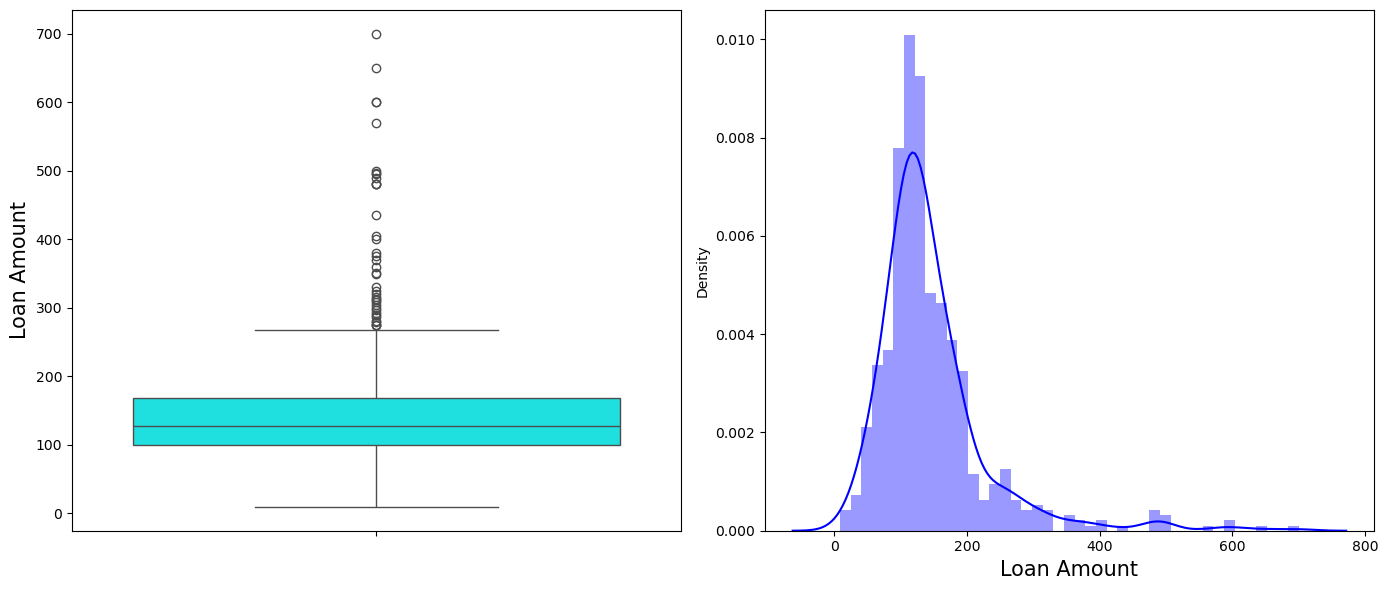

In [115]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [116]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


#### Comment -
- The mean is greater than median loan amount.
- Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.

<b> As extreme outliers are present in feature and for that reason as data is more sensitive to mean we are going to impute missing values in <u>loan amount  with median.</u> </b>

### Imputation of Missing values

#### Imputation details :
1. Missing values in Loan amount is impute with median value.
2. Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
3. Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [117]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna('unknown',inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

### Missing Value Check After Imputation

In [118]:
# missing_values = df.isnull().sum().sort_values(ascending = False)
# percentage_missing_values =(missing_values/len(df))*100
# print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))


df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Comment :
<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

### Statistical Matrix

In [119]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Comment:
- In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.
- Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.
- Since Credit History is Categorical variable there is no significance in different statstical parameter of it.
- Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.
- Minimum Applicant income is 150 and maximum is 81000.


<b> Let dive into exploration of Target and independent feature.</b>

### Target Variable

# Encoding categorical data

In [120]:
df["Dependents"]=df["Dependents"].replace("3+",3)
df["Dependents"]=df["Dependents"].astype(int)

In [121]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
Category=df.select_dtypes(include="object")
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [122]:
X=df.drop("Loan_Status",axis=1)

In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)
X_scale=pd.DataFrame(X_sc,columns=X.columns)
X_scale

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.382616,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.273231,0.411733,1.223298
1,0.382616,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-1.318513
2,0.382616,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1.223298
3,0.382616,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.306435,0.273231,0.411733,1.223298
4,0.382616,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.056551,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-1.990376,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.889500,0.273231,0.411733,-1.318513
610,0.382616,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.258378,-2.522836,0.411733,-1.318513
611,0.382616,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.276168,0.273231,0.411733,1.223298
612,0.382616,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.490816,0.273231,0.411733,1.223298


In [124]:
np.round(X_scale.describe(),2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.99,-1.37,-0.74,-0.53,-0.39,-0.86,-0.55,-1.63,-5.13,-2.43,-1.32
25%,0.38,-1.37,-0.74,-0.53,-0.39,-0.41,-0.55,-0.54,0.27,0.41,-1.32
50%,0.38,0.73,-0.74,-0.53,-0.39,-0.26,-0.15,-0.21,0.27,0.41,-0.05
75%,0.38,0.73,0.25,-0.53,-0.39,0.06,0.23,0.23,0.27,0.41,1.22
max,2.76,0.73,2.24,1.89,2.55,12.38,13.70,6.60,2.14,0.41,1.22


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [126]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

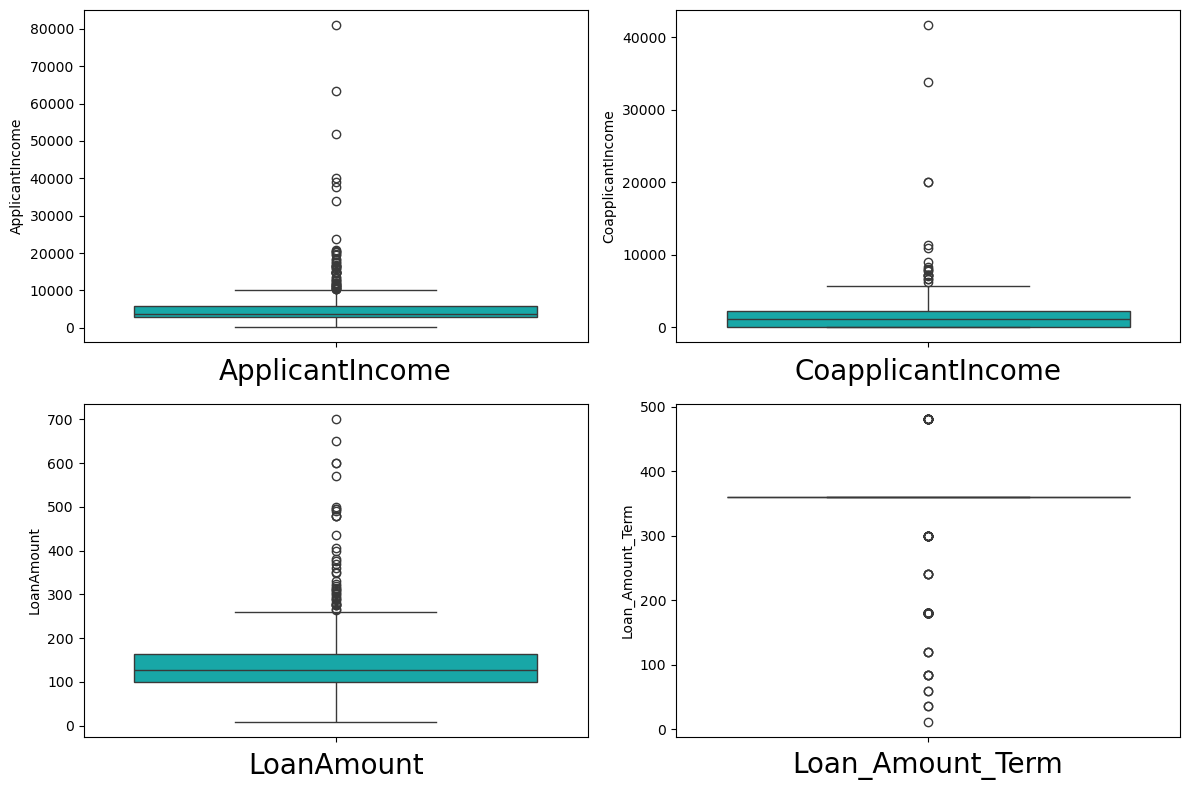

In [127]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1
for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(y=df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

In [128]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


##### Data Loss

## 2.  Skewness of features

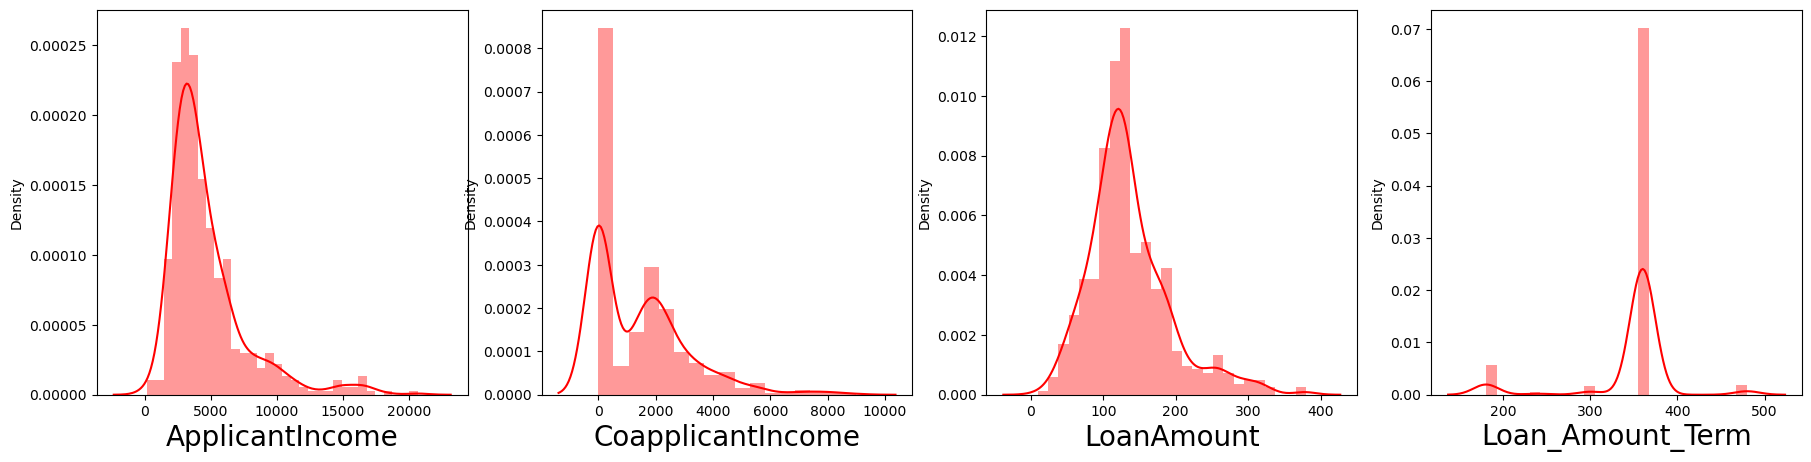

In [129]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [130]:
df.skew()  #-0.5 --- 0.5--- normal range

Gender              -0.991250
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

#### Comment :
- <b> Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.</b>
- Other features are categorical in nature so skewness is nothing to do with these remaining feature.<u>We will ignore them.</u>
- We will yeo-johnson transformation method.

In [131]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [132]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


####  Checking skewness after using yeo-johnson ethod

In [133]:
df.skew()

Gender              -0.991250
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

<b> For Numerical variable skewness is within permissible limit.

So Yes To Go Forward !!!
</b>

## 3. Corrleation 

In [134]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.357644,0.174277,0.027503,0.026601,0.051968,0.224699,0.172147,-0.100887,-0.003570,-0.031359,0.001946
Married,0.357644,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.174277,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.027503,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,0.026601,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.051968,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.224699,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172147,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.100887,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,-0.003570,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


#### Observation:
<b> Most of feature are poorly or moderately correlated with target variable expect Credit History. </b>
-  Maximum correlation of 0.561 exist between Credit History and Loan status.

 ## 4. Checking Multicollinearity between features using variance_inflation_factor

<b> All features VIF is within permissible limit of 10. 

So No Need to Worry About Multicollinearity.</b>


## 5. Balanceing Imbalanced target feature

In [135]:
df.Loan_Status.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [136]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [137]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

### Finding best Random state

In [139]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8850574712643678 on Random_state 12


## Logistics Regression Model

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)


In [141]:
#from sklearn.metrics import classification_report
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.44      0.96      0.60        23
           1       0.99      0.81      0.89       151

    accuracy                           0.83       174
   macro avg       0.72      0.89      0.75       174
weighted avg       0.92      0.83      0.86       174



In [142]:
print(confusion_matrix(y_pred,Y_test))

[[ 22   1]
 [ 28 123]]


In [143]:
# All Steps of ML -:
#missing value
#encoding
#zscore
#skewness
#seperate X,y
#scaling
#ML

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dtc = DecisionTreeClassifier()

In [146]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [147]:
dtc.score(X_train, Y_train)

1.0

In [148]:
dtc.score(X_test, Y_test)

0.7183908045977011

In [149]:
# Note --> If difference is more than it is called Overfitting situation.

In [150]:
dtc1 = DecisionTreeClassifier(criterion = 'entropy')
dtc1.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [151]:
dtc1.score(X_train, Y_train)

1.0

In [152]:
dtc1.score(X_test, Y_test)

0.7873563218390804

In [153]:
dtc2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [154]:
dtc2.score(X_train, Y_train)

0.8188585607940446

In [155]:
dtc2.score(X_test, Y_test)

0.8333333333333334

In [156]:
# Note --> 100% accuracy is never in any model.
# Now dtc2 object is much better above two dtc and dtc1 object.

In [157]:
# hum kitne bar check kranga taki ya accuracy similar aay "train" and "test" ke bich --> 
  #  us ka liya use hota "HyperParameter Tuning".

In [158]:
# HyperParamater Tuning --> 1. GridSearchCV, 2. RandomizeSearchCV  [CV is cross-validation]
 # We pass a range of parameters 
 # Model Evaluate that and Return Best Parameter from them.

# How many parameters in Decision Tree and what is the mean of these parameters --> go to "max_depth" and 
  # press "shift + tab" -> open something then click on right top (+) icon then show all parameters.
# 1. criterion='gini', 2. splitter='best', 3. max_depth=None, 4. min_samples_split=2, 5. min_samples_leaf=1,
# 6. min_weight_fraction_leaf=0.0, 7. max_features=None, 8. random_state=None, 9. max_leaf_nodes=None,
# 10. min_impurity_decrease=0.0, 11. class_weight=None, 12. ccp_alpha=0.0, 13.monotonic_cst=None,

In [159]:
# itne sare parameters and which one is best than use --> (example)

from sklearn.model_selection import GridSearchCV

para_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [160]:
grid_search = GridSearchCV(dtc, para_grid, cv = 5) # cv = 5 means 5 bar cross-validate hoga(5 bar check hoga)

In [161]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [162]:
print('Best Params:', grid_search.best_params_)

Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [164]:
# abhi tk hm decide nhi kr pa raha tha ke criterion kya rakhna aur baki ka sab kuch kya rakhna hai, 
  # ab jo upper nikala hai wahi rakhna hai kyuki ya best hai.


dtc1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2, min_samples_split = 2 )
dtc1.fit(X_train, Y_train)
y_pred = dtc1.predict(X_test )

In [165]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.46      0.92      0.61        25
           1       0.98      0.82      0.89       149

    accuracy                           0.83       174
   macro avg       0.72      0.87      0.75       174
weighted avg       0.91      0.83      0.85       174



In [ ]:
# is tarika se model jo bnaga -- 80% ke sourity daga.

In [166]:
print(confusion_matrix(y_pred, Y_test))

[[ 23   2]
 [ 27 122]]


In [ ]:
# Complete it -----------------------------------

# Rechecking -->....

In [167]:
# jo manually diya hai ab khud yahi decide kraga which one is best.

para_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1,50,2)],
    'min_samples_split': [i for i in range(1,20,3)],
    'min_samples_leaf': [i for i in range(1, 10)]
}

In [168]:
grid_search = GridSearchCV(dtc, para_grid, cv = 5)

In [169]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                       43, 45, 47, 49],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 4, 7, 10, 13, 16, 19]})

In [170]:
print('Best Params:', grid_search.best_params_)

Best Params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [171]:
dtc1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, min_samples_leaf = 1, min_samples_split = 4 )
dtc1.fit(X_train, Y_train)
y_pred = dtc1.predict(X_test )

In [172]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.44      0.96      0.60        23
           1       0.99      0.81      0.89       151

    accuracy                           0.83       174
   macro avg       0.72      0.89      0.75       174
weighted avg       0.92      0.83      0.86       174



In [173]:
print(confusion_matrix(y_pred, Y_test))

[[ 22   1]
 [ 28 123]]


In [ ]:
# Parameters jitna jyada lgaoge utne aachi accuracy milage.